# Github Repo Classification


In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
import sklearn

import sys
import os

from main import normalize_data
from metrics.githubMetrics import GithubMetrics, metricCollection
from importer.datasetImporter import DatasetImporter

## Data Aggregation

In [2]:
def aggregate_data(repo_links):
    metrics_data = []
    for link in repo_links:
        github_metrics = GithubMetrics(link)
        metrics_data.append([link] + [github_metrics.get(m) for m in metrics])

    return pd.DataFrame(data=metrics_data, columns=['repo'] + metrics)

In [3]:
importer = DatasetImporter('data/testset.csv')
X_unnorm = importer.data
y = importer.target
X = normalize_data(X_unnorm)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

X[:5]

html_count  png_count  is_io_page  md_count  forks_count  up_to_dateness  \
0      0.0000   0.007822         0.0  0.187607     0.568104        0.000012   
1      0.0000   0.000000         0.0  0.230062     0.534389        0.044766   
2      0.0422   0.113809         0.0  0.290305     0.000000        0.016599   
3      0.0000   0.000000         0.0  0.415712     0.000000        0.009023   
4      0.0000   0.074129         0.0  0.217729     0.000000        0.252077   

   doc_in_description_or_title  doc_terms_in_readme  repo_size  file_count  \
0                          0.0             0.079104   0.754886    0.536725   
1                          0.0             0.000000   0.369765    0.287825   
2                          0.0             0.222073   0.734425    0.599871   
3                          0.0             0.347449   0.373365    0.487819   
4                          0.0             0.125377   0.508359    0.491944   

        ...        intro_or_course_in_description_or_title  \
0       ...                                            0.0   
1       ...                                            0.0   
2       ...                                            0.0   
3       ...                                            0.0   
4       ...                                            0.0   

   hw_in_description_or_title  avg_folder_depth  hw_terminology_files  \
0                         0.0          0.260950              0.000000   
1                         0.0          0.201288              0.000000   
2                         0.0          0.289988              0.000000   
3                         0.0          0.793583              0.195343   
4                         0.0          0.588078              0.000000   

   file_folder_ratio  open_issue_count  avg_entropy  pdf_count  \
0           0.358461          0.636555     0.614573   0.000000   
1           0.203083          0.151468     0.602981   0.000000   
2           0.297784          0.000000     0.701683   0.303299   
3           0.228334          0.000000     0.605136   0.000000   
4           0.263303          0.000000     0.618334   0.000000   

   hw_terminology_commits  edu_mail_ratio  
0                0.625261        0.005291  
1                0.000000        0.000000  
2                0.356451        0.011194  
3                0.000000        0.000000  
4                0.087206        0.024390  

[5 rows x 22 columns]

In [4]:
X_unnorm[:5]

html_count  png_count  is_io_page  md_count  forks_count  up_to_dateness  \
0    0.000000   0.004975           0       5.0          645    7.389266e+03   
1    0.000000   0.000000           0       8.0          439    1.126876e+07   
2    0.025741   0.074883           0      15.0            0    4.181170e+06   
3    0.000000   0.000000           0      52.0            0    2.274816e+06   
4    0.000000   0.048159           0       7.0            0    6.343492e+07   

   doc_in_description_or_title  doc_terms_in_readme  repo_size  file_count  \
0                            0                    1      80543         603   
1                            0                    0        252          30   
2                            0                    6      59299        1282   
3                            0                   20        266         336   
4                            0                    2       2012         353   

        ...        intro_or_course_in_description_or_title  \
0       ...                                              0   
1       ...                                              0   
2       ...                                              0   
3       ...                                              0   
4       ...                                              0   

   hw_in_description_or_title  avg_folder_depth  hw_terminology_files  \
0                           0          1.971429                     0   
1                           0          1.714286                     0   
2                           0          2.105263                     0   
3                           0          5.666667                     2   
4                           0          3.880952                     0   

   file_folder_ratio  open_issue_count  avg_entropy  pdf_count  \
0          12.306122               338     0.607390   0.000000   
1           3.333333                 3     0.595933   0.000000   
2           7.585799                 0     0.693482   0.224649   
3           4.200000                 0     0.598064   0.000000   
4           5.693548                 0     0.611107   0.000000   

   hw_terminology_commits  edu_mail_ratio  
0                     143        0.005291  
1                       0        0.000000  
2                      16        0.011194  
3                       0        0.000000  
4                       1        0.024390  

[5 rows x 22 columns]

In [5]:
# X_std = np.log(X_unnorm + 1.0)

# minmax_scaler = sklearn.preprocessing.MinMaxScaler().fit(X_std)
# X_std = minmax_scaler.transform(X_std)
# std_scaler = sklearn.preprocessing.StandardScaler().fit(X_std)
# X_std = std_scaler.transform(X_std)

# robust_scaler = sklearn.preprocessing.RobustScaler().fit()
# X_std = robust_scaler.transform(X_std)

# X_std = pd.DataFrame(X_std, columns=X.columns)
# X_std[:5]

## Visualizations

we want to compare stuff

In [6]:
metric_list = list(metricCollection.keys())

In [12]:
def boxplots(data, y_data):
    h = math.ceil(len(metric_list) / 2)
    fig, axes = plt.subplots(nrows=h, ncols=2, figsize=(16, 40))
    for i, metric in enumerate(metric_list):
        x = i % 2
        y = int(i / 2)
        data_per_metric = data[metric]
        
        classes = np.unique(y_data)
        data_per_class = []
        for cls in classes:
            data_per_class.append(data_per_metric[y_data == cls])
        
        axes[y, x].boxplot(data_per_class, labels=classes, sym='rx')
        axes[y, x].set_title(metric)
        axes[y, x].set_ylim([-0.2, 1])

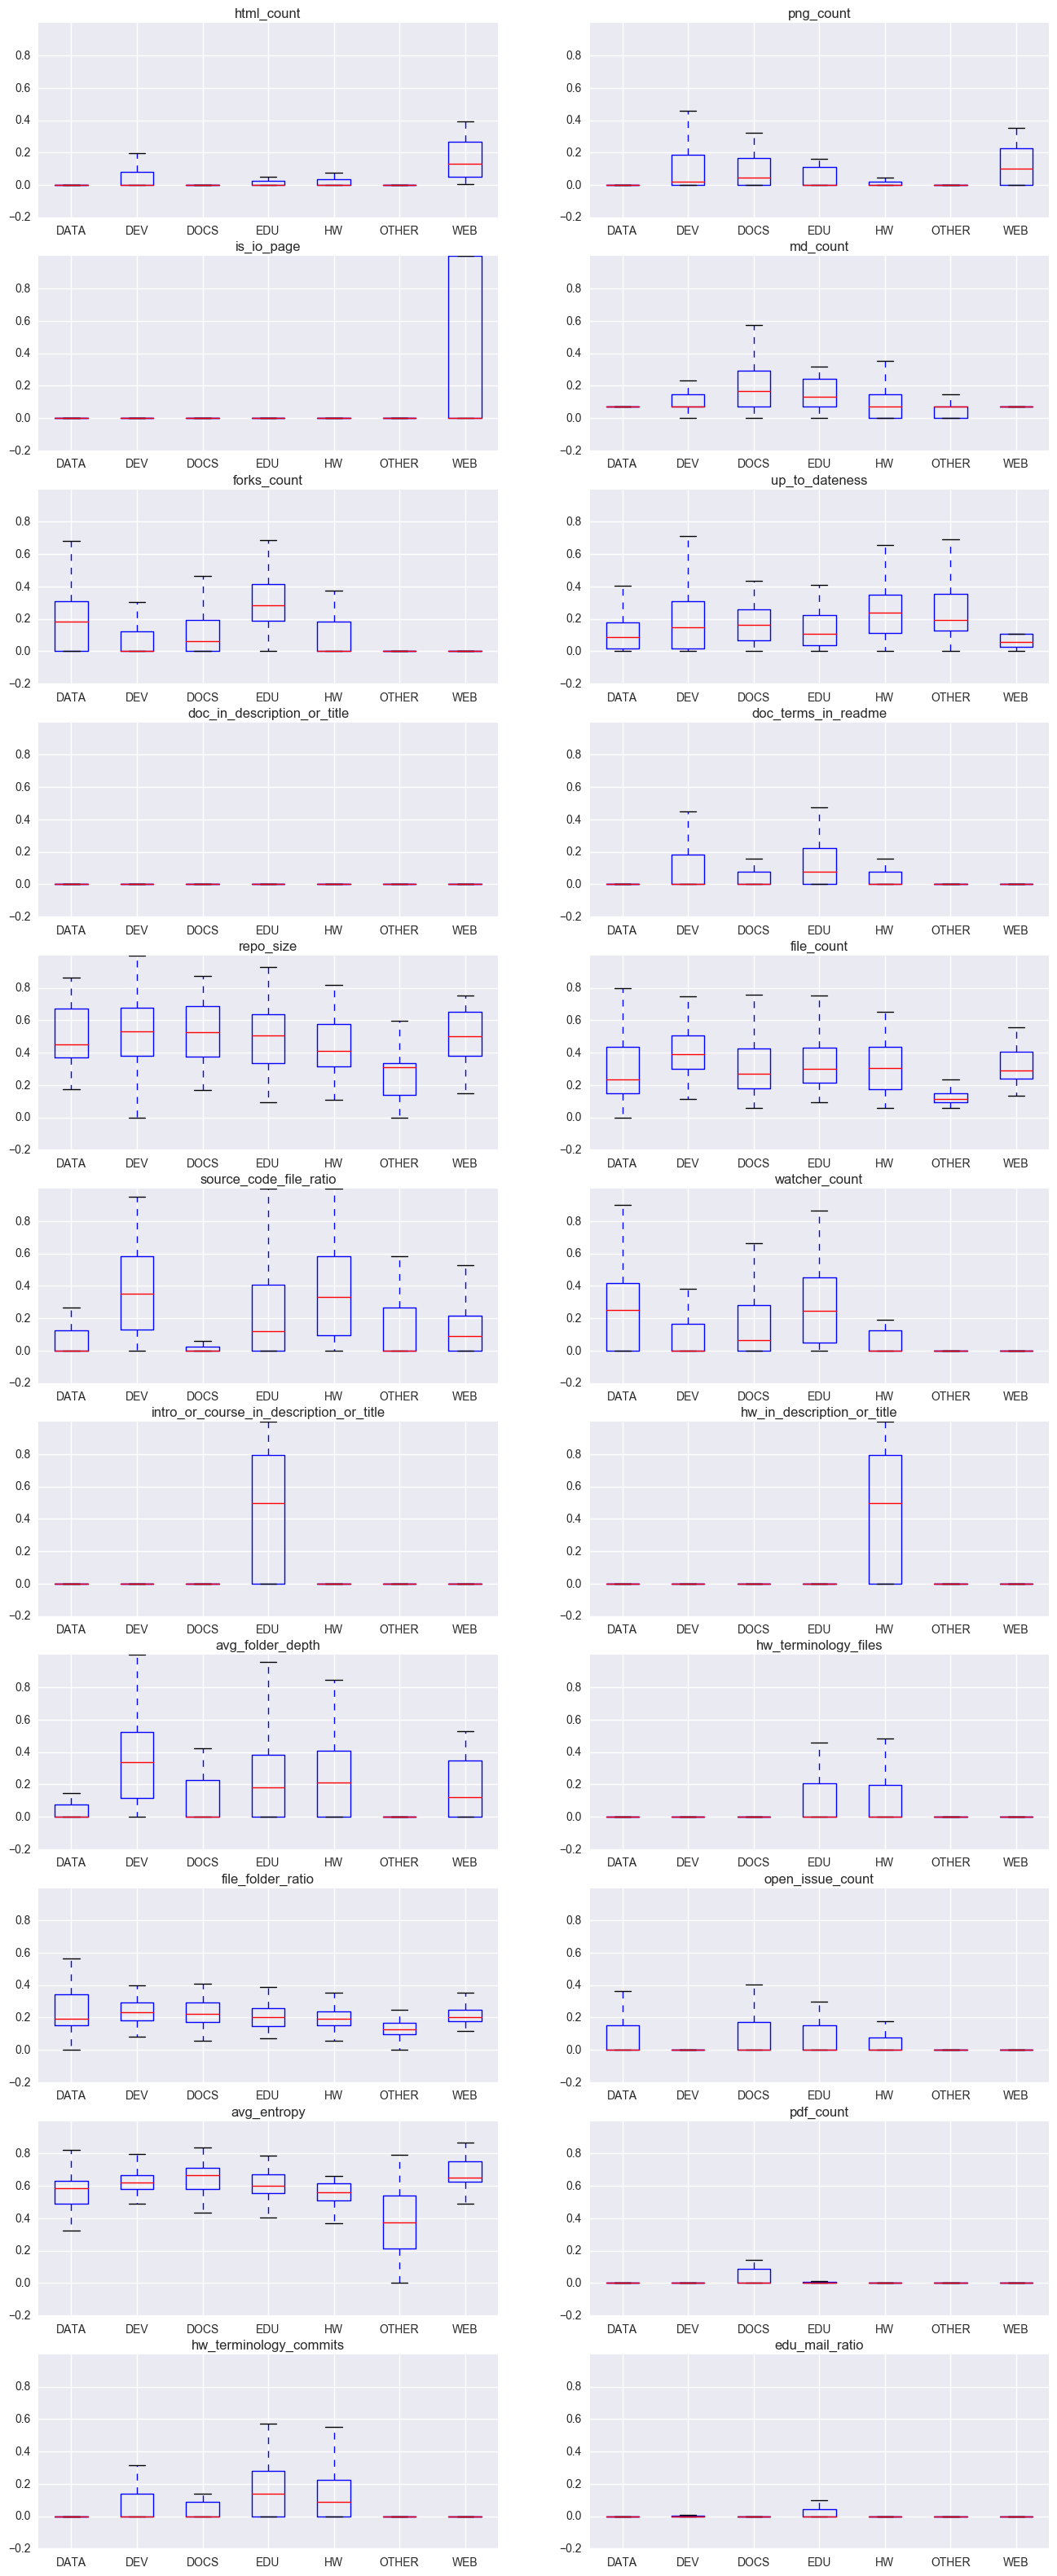

In [14]:
boxplots(X, y)

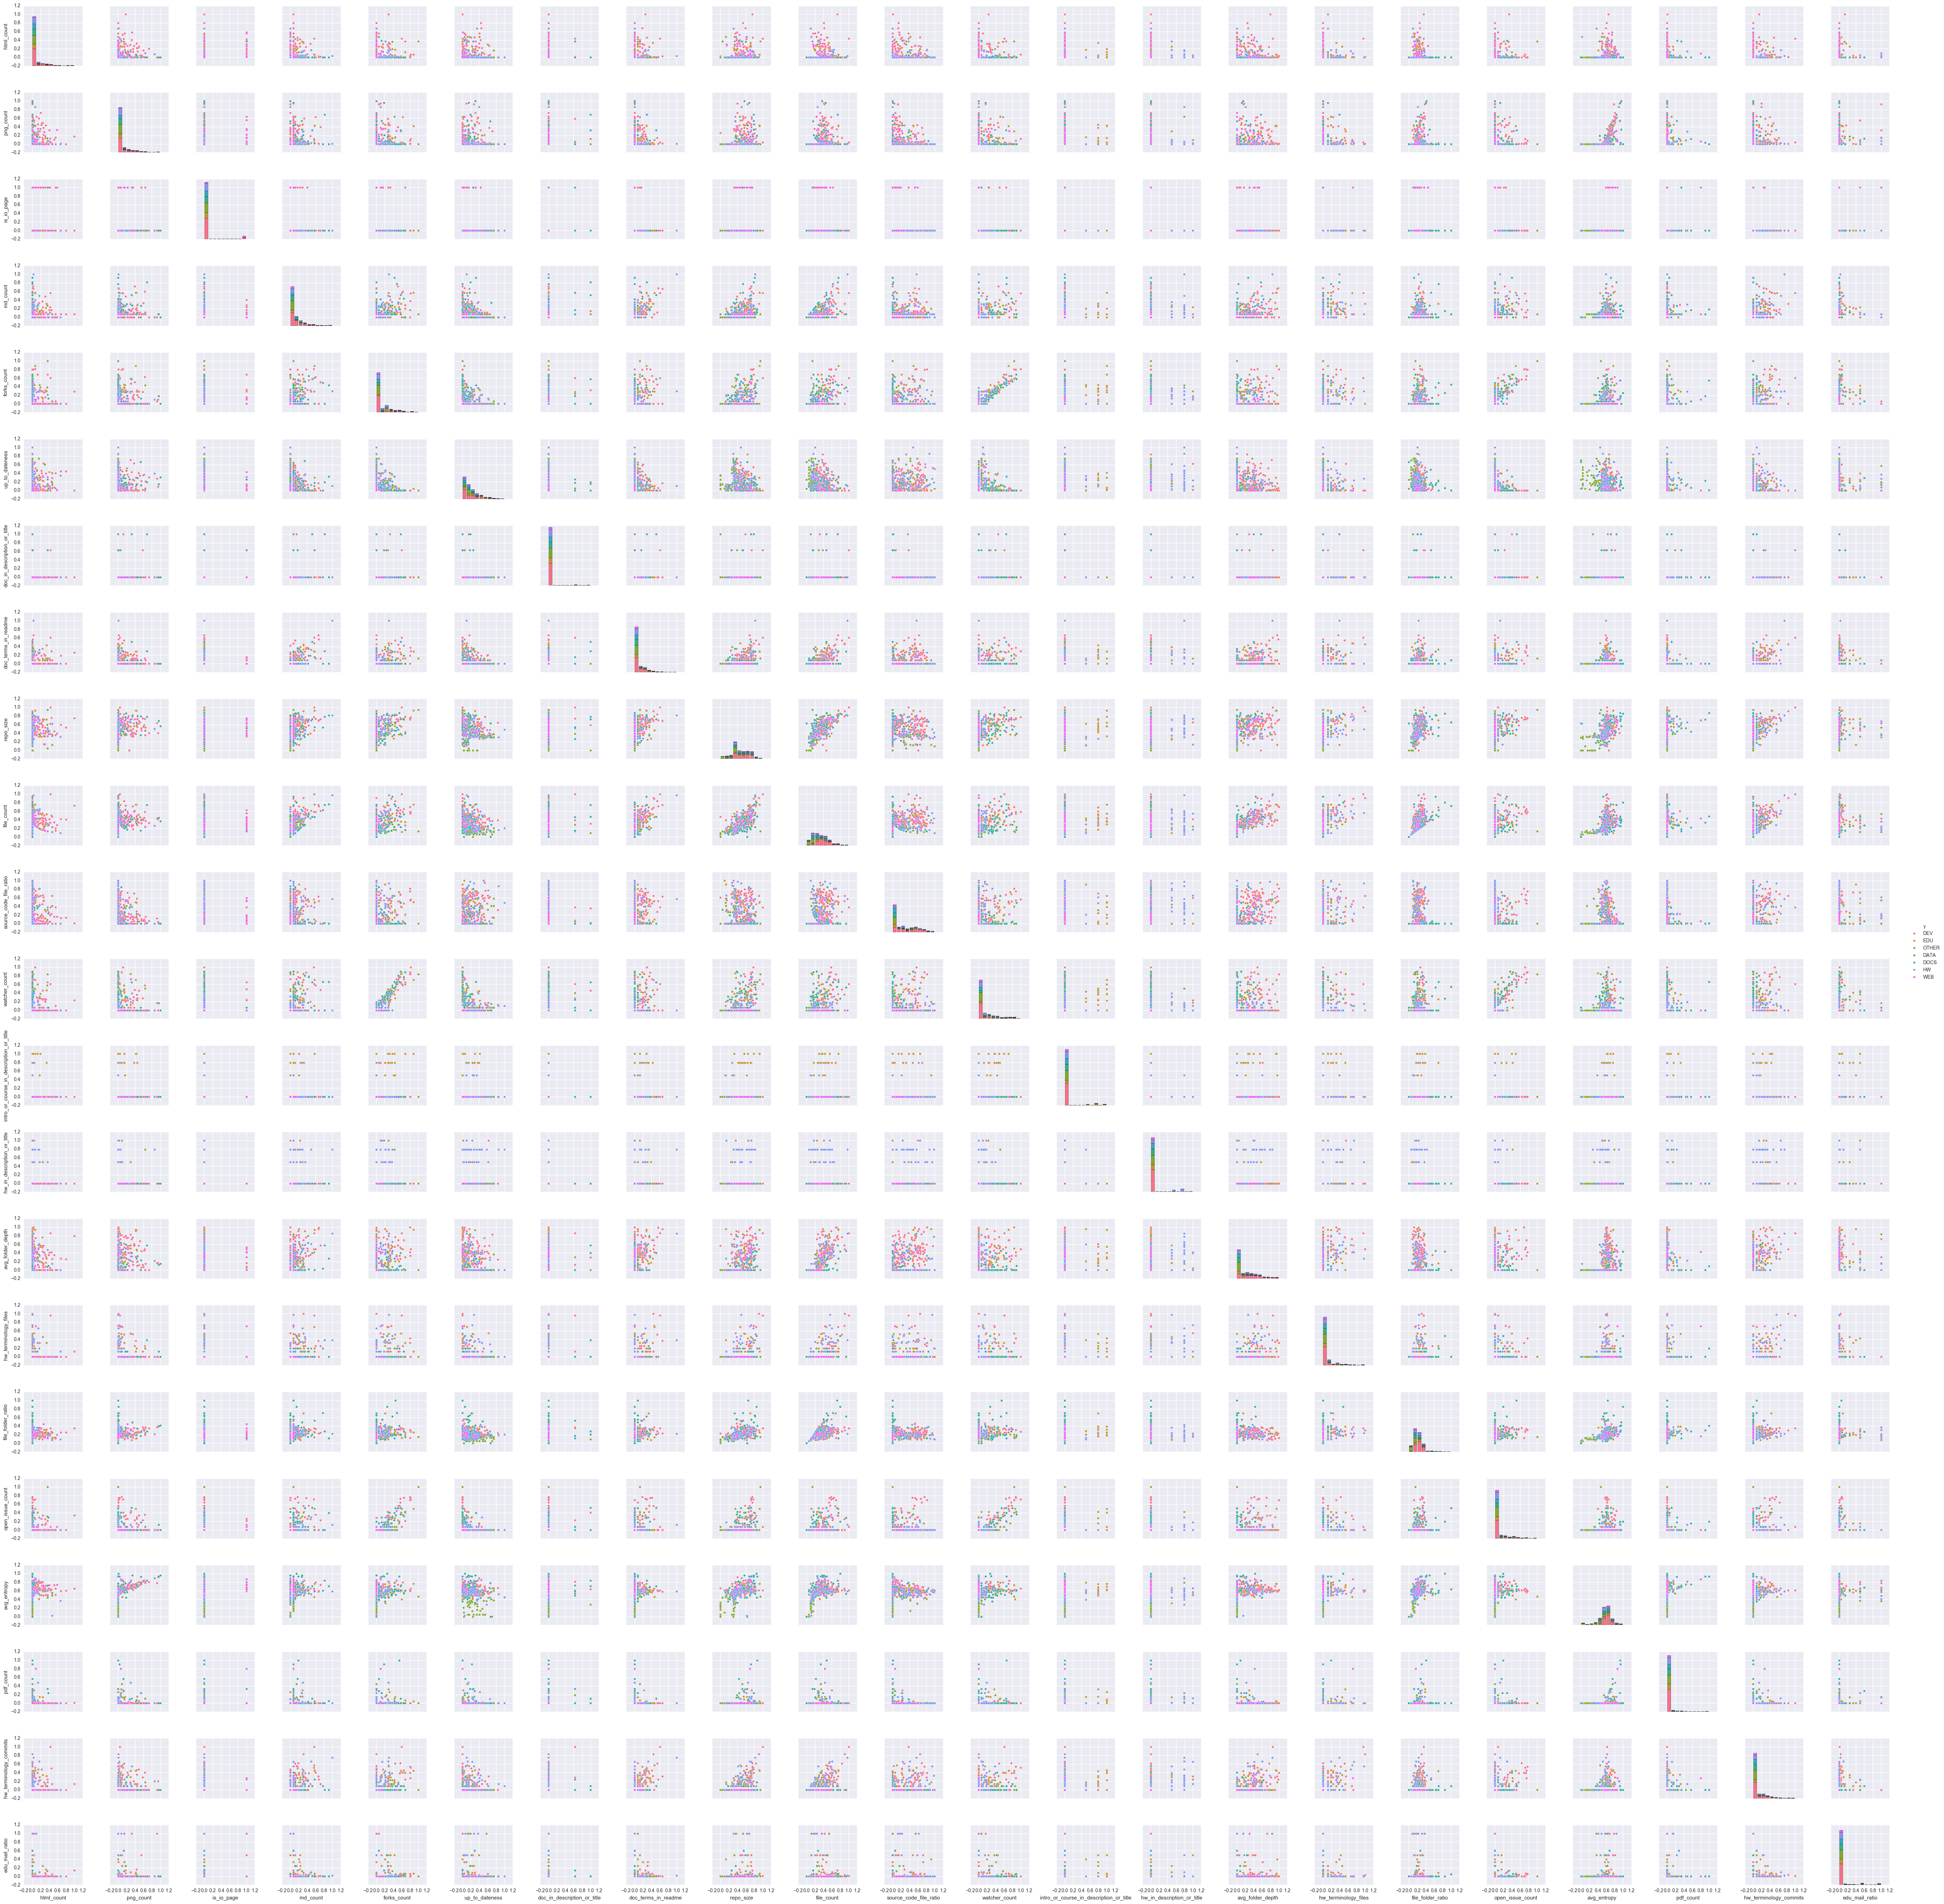

In [15]:
plot_data = X.copy()
plot_data['y'] = y
pplot = sbn.pairplot(plot_data, hue='y')
#pplot.savefig('colored_pairplot.png')

In [16]:
#fig = plt.figure(figsize=(16,8))
def bar_plots(data):
    f, axarr = plt.subplots(len(metricCollection), sharex=True, figsize=(16,20))

    index = np.arange(len(data))
    for i, metric in enumerate(metricCollection):
        ax = axarr[i]
        ax.bar(index,
            data[metric],
            0.7, # barwdith
            label=metric
        )
        ax.set_title(metric)

    plt.xticks(index + 0.35, index)
    None

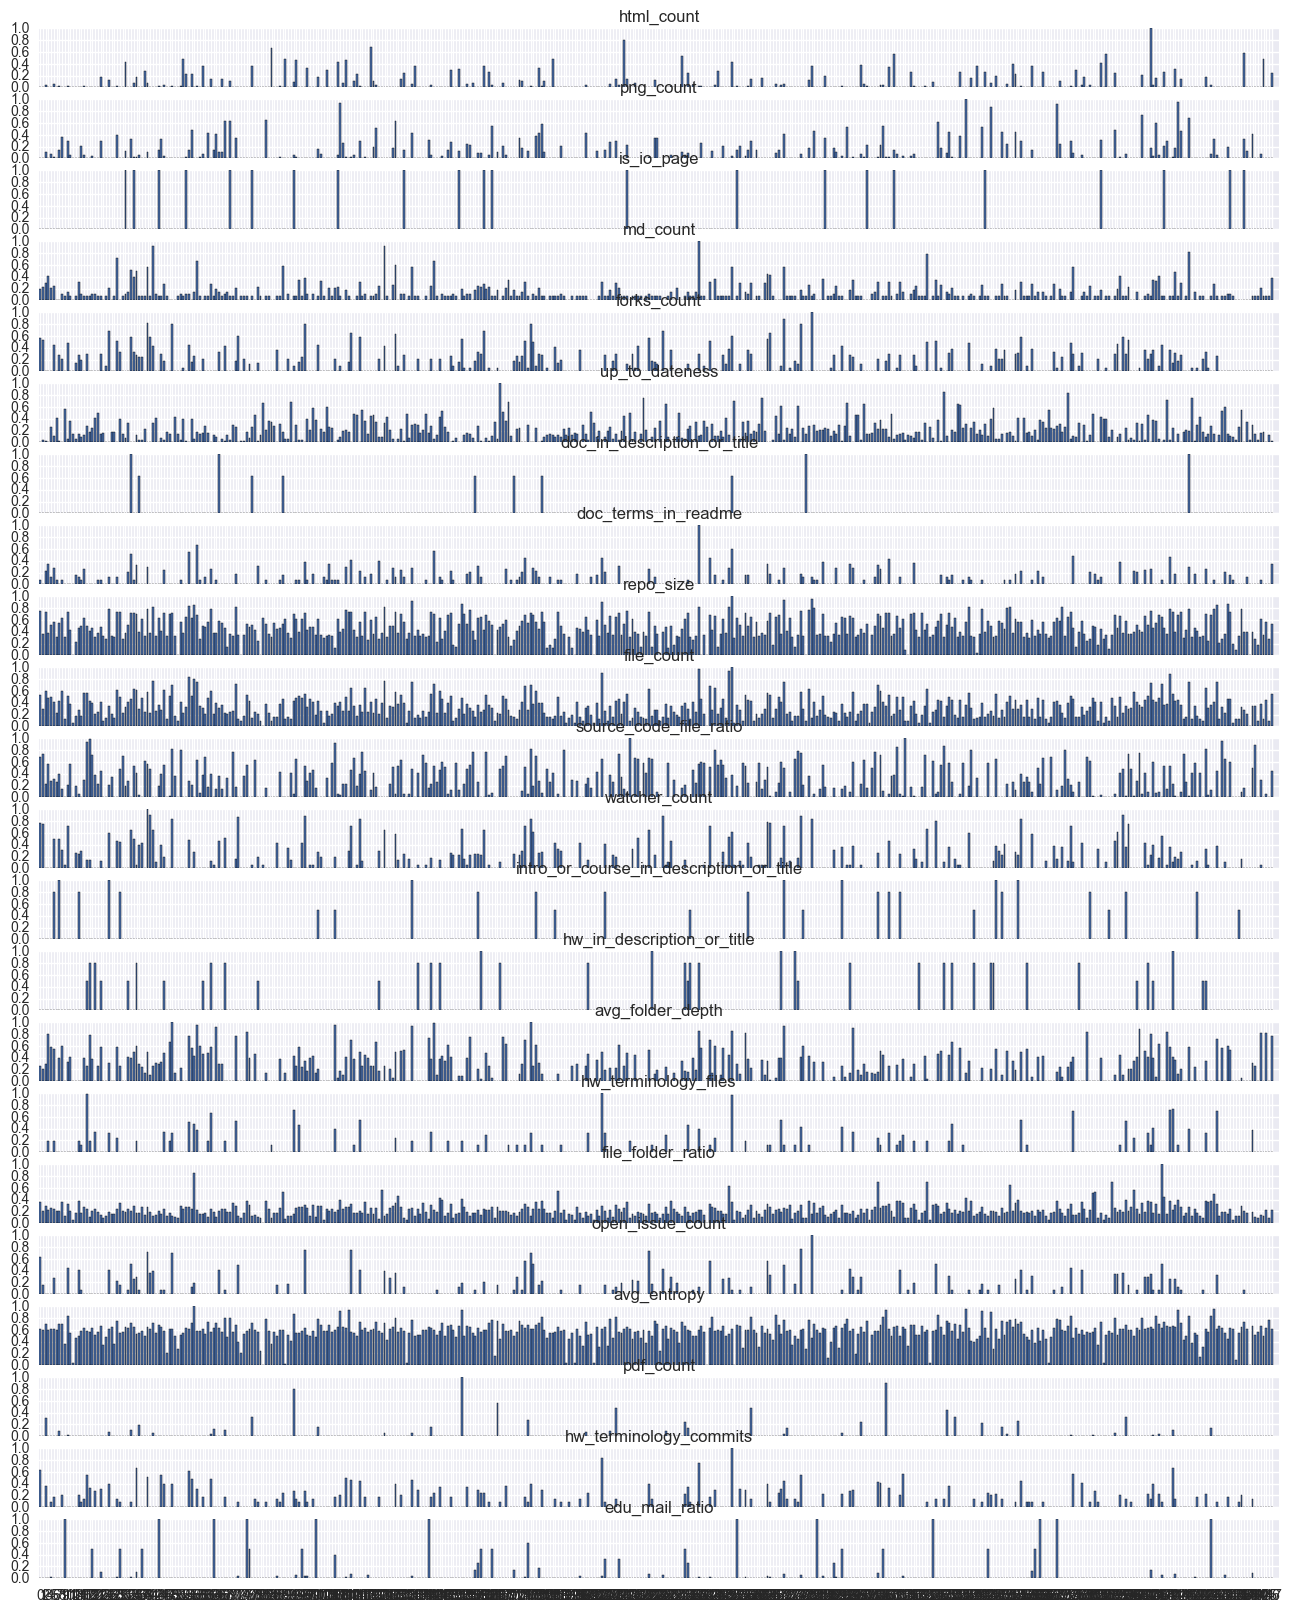

In [17]:
bar_plots(X)